In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

2.1 >Dataset information

1.>gender:sex of students -> (Male/female)

2.>race/ethinicity

3.>parental level of education  -> parents final level of education

4.>test preparation course

5.>maths score

6.>reading score

7.>writing score


2.2> Data Check to perform
1.>check missing values

2.>check duplicates

3.>check data type

4.>check the number of unique values of each column

5.>check stats of each dataset

6.>check various categories present

In [5]:
# check missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

observation: There is no missing values in the dataset

In [6]:
# check duplicates
df.duplicated().sum()

0

observation:there are no duplicates

In [7]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# checking the number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# check stats of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


>INSIGHT

1.from above description we can see that all the mean are very close to each other-between 77 and 68.05

2.there is a minimum score 0 for maths , whereas minimum score for reading is 17 and for writing the minimum score is 10

3.All standard deviation are also very close.

In [10]:
# exploring data
print("categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("categories in 'race' variable:  ",end=" ")
print(df['race_ethnicity'].unique())


print("categories in 'parental level of education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("categories in 'test prep course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable:   ['female' 'male']
categories in 'race' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:   ['standard' 'free/reduced']
categories in 'test prep course' variable:   ['none' 'completed']


In [11]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print("we have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("we have {} categorical features : {}".format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
# adding cols for total score and average
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'number of students with full marks in maths:{math_full}')
print(f'Number of students with full marks in writing:{writing_full}')
print(f'Number of students with full marks in reading:{reading_full}')

number of students with full marks in maths:7
Number of students with full marks in writing:14
Number of students with full marks in reading:17


In [14]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()
print(f'number of students with less than 20 marks in maths:{reading_less_20}')
print(f'Number of students with less than 20 marks in writing:{writing_less_20}')
print(f'Number of students with less than 20 marks in reading:{math_less_20}')


number of students with less than 20 marks in maths:1
Number of students with less than 20 marks in writing:3
Number of students with less than 20 marks in reading:4


Insights

>from above we can see that students have performed best in reading section and worst in maths section

EXPLORING DATA(VISUALISATION)

Visualize average score distribution to make some conclusion

1.Histogram

2.Kernel distribution Function(KDE)

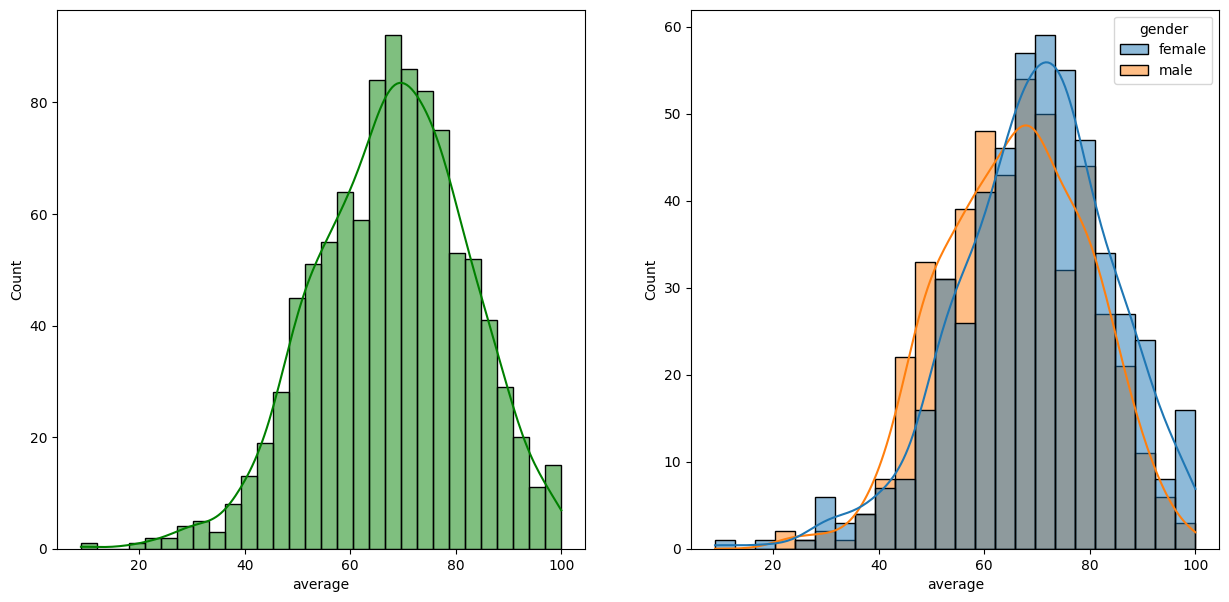

In [15]:
fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()


insight :
Female students tends to perform better then male students

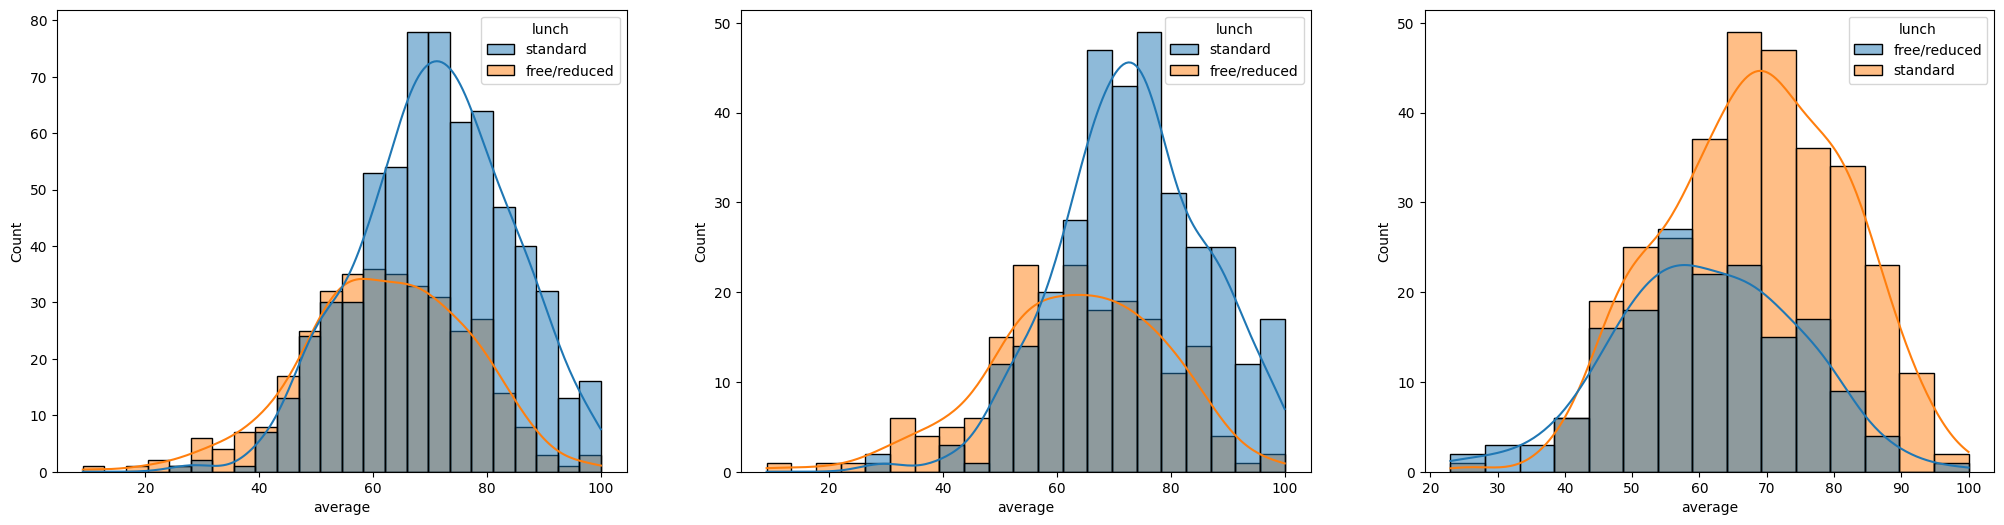

In [16]:
fig,ax = plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights :

Standard lunch helps in performing better in exam

Standard lunch performs helps in performing better in exam be it male or female

<Axes: xlabel='average', ylabel='Count'>

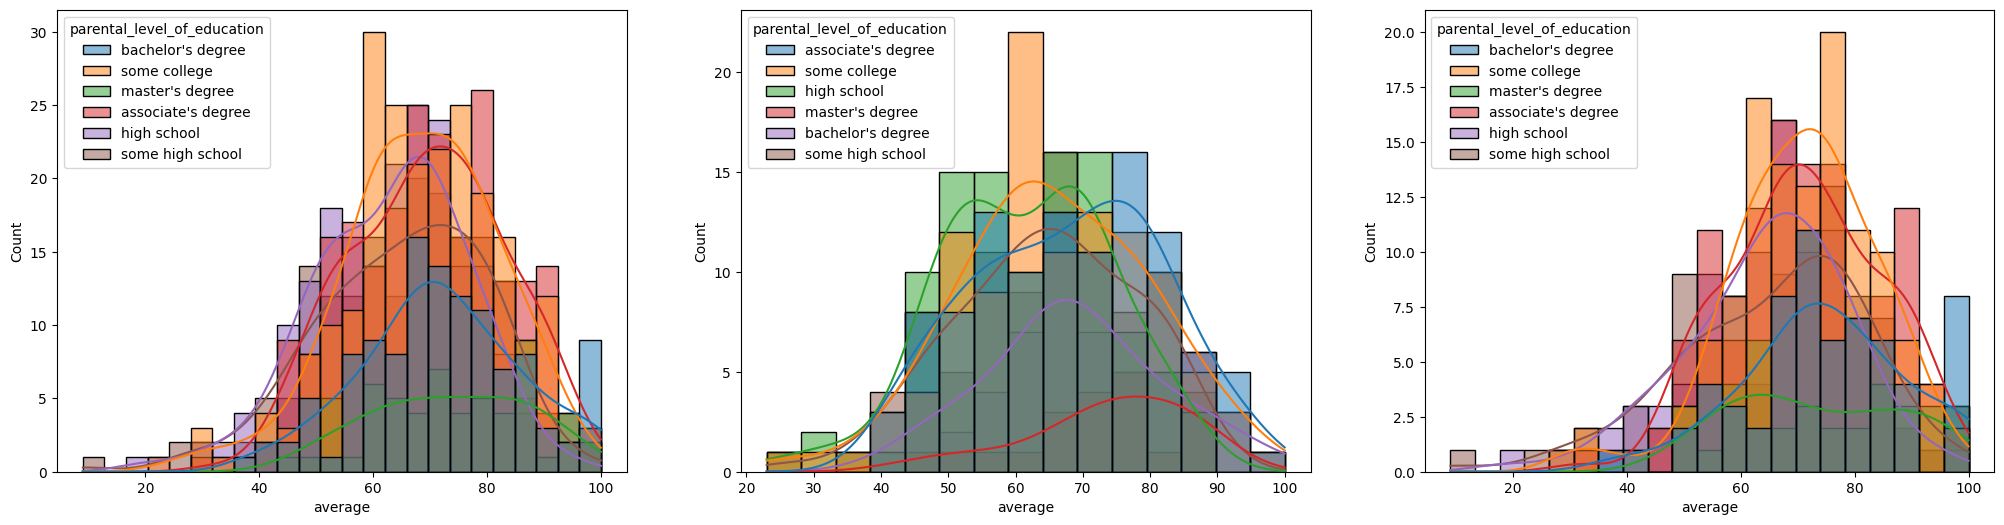

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data= df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')

Insights :
in general parents education qualification does not matter for students to perform in their exams

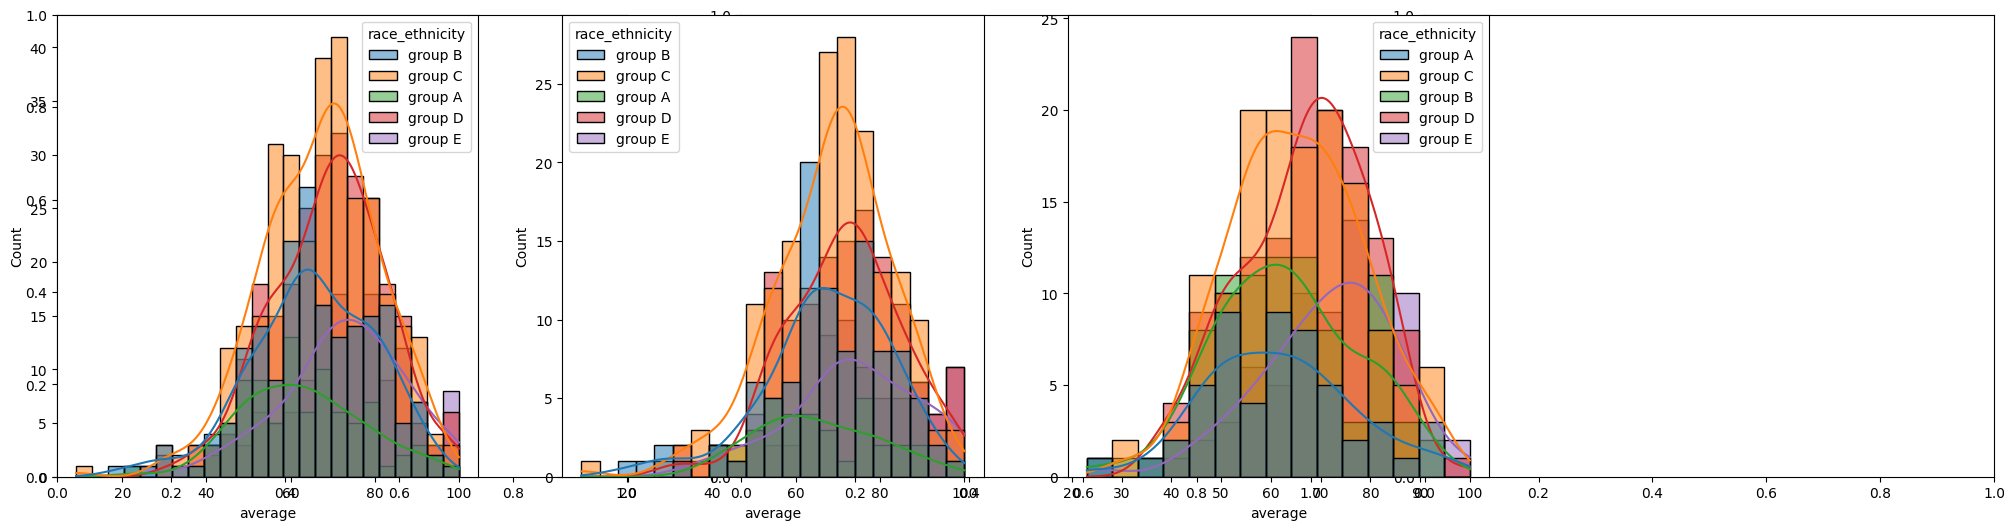

In [18]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

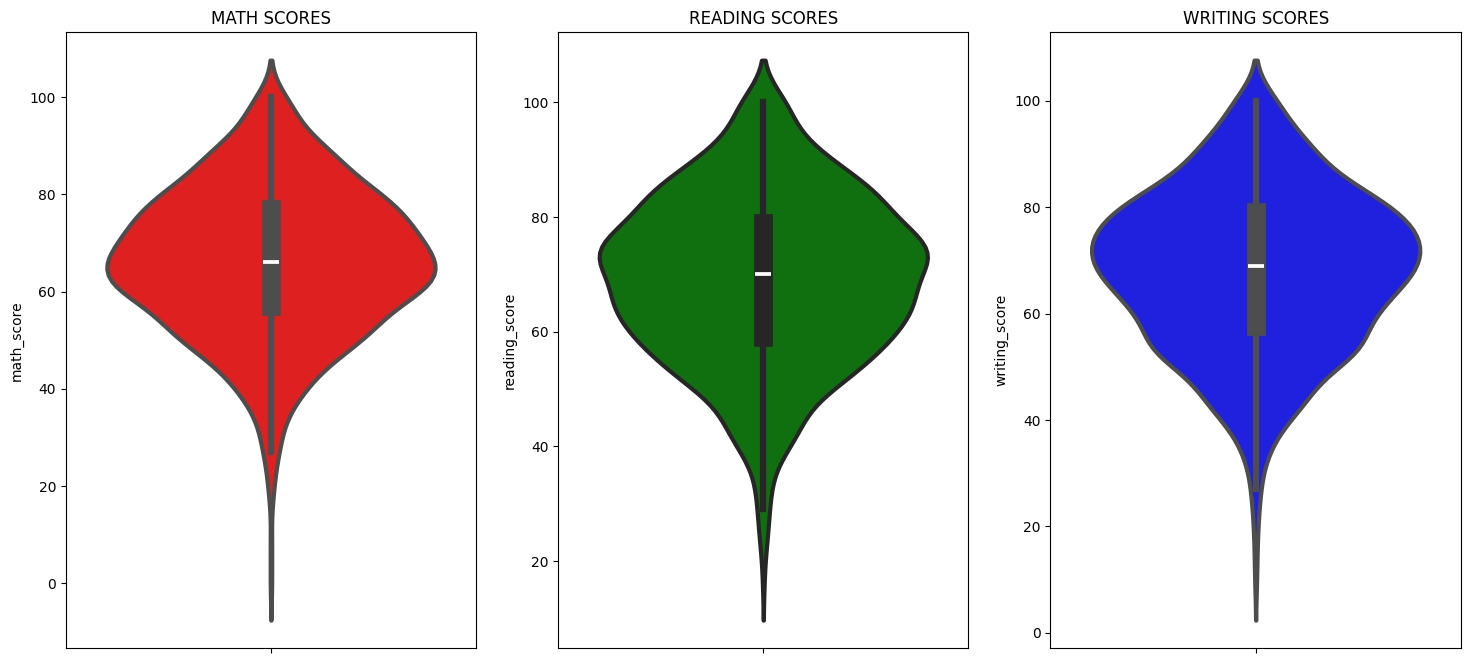

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

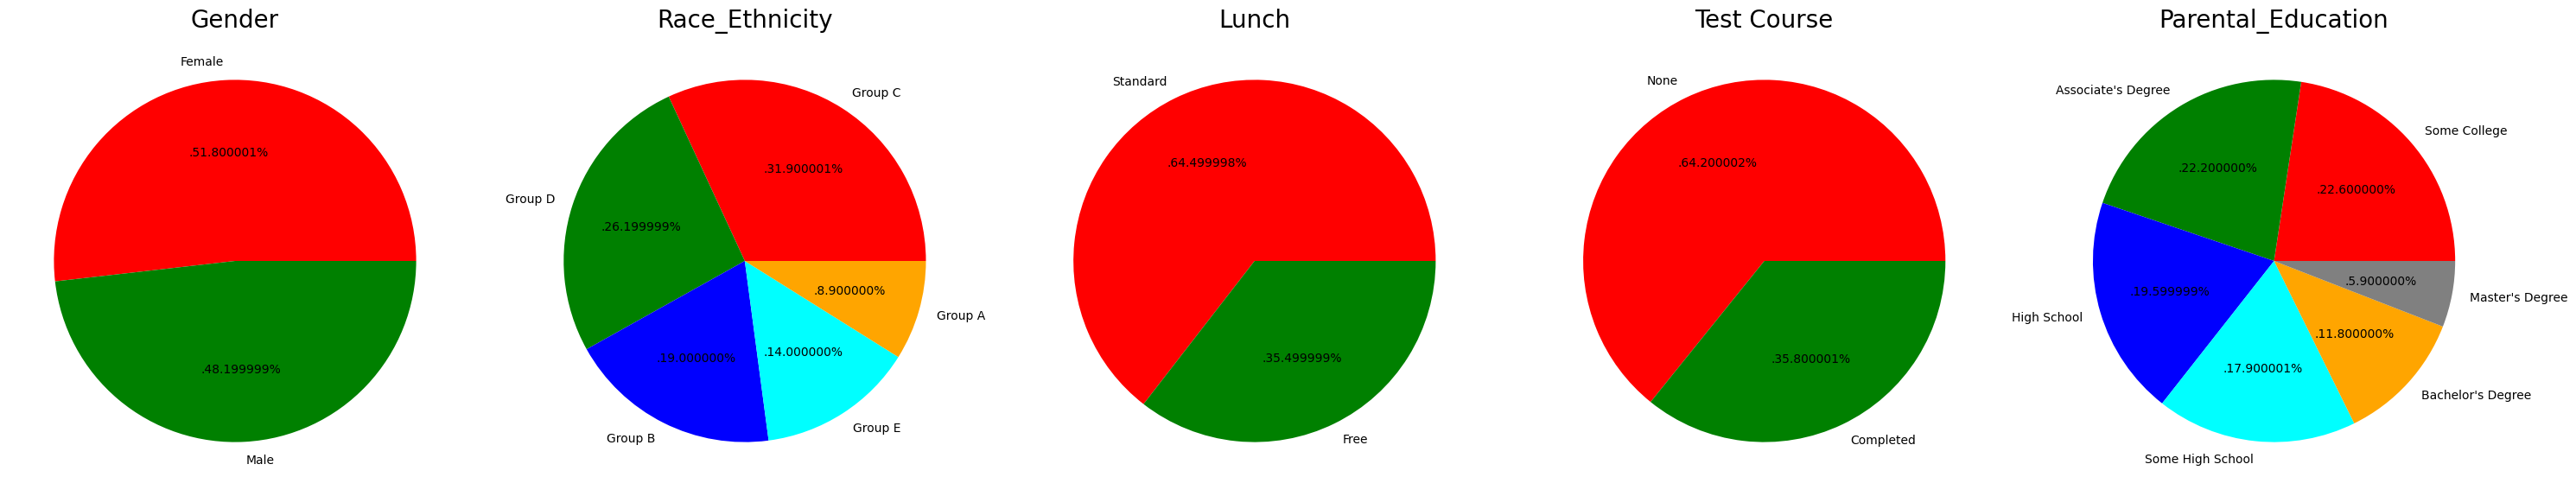

In [20]:
# mutlivariate analysis using pie plot
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,colors=color,labels = labels,autopct='.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


Insights

Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test 
preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Feature Wise Visualisation

Gender Column

1.How is distribution of Gender?

2.Is gender has any impact on student's performance?

C:\Users\samri\AppData\Local\Temp\ipykernel_19584\2135190967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


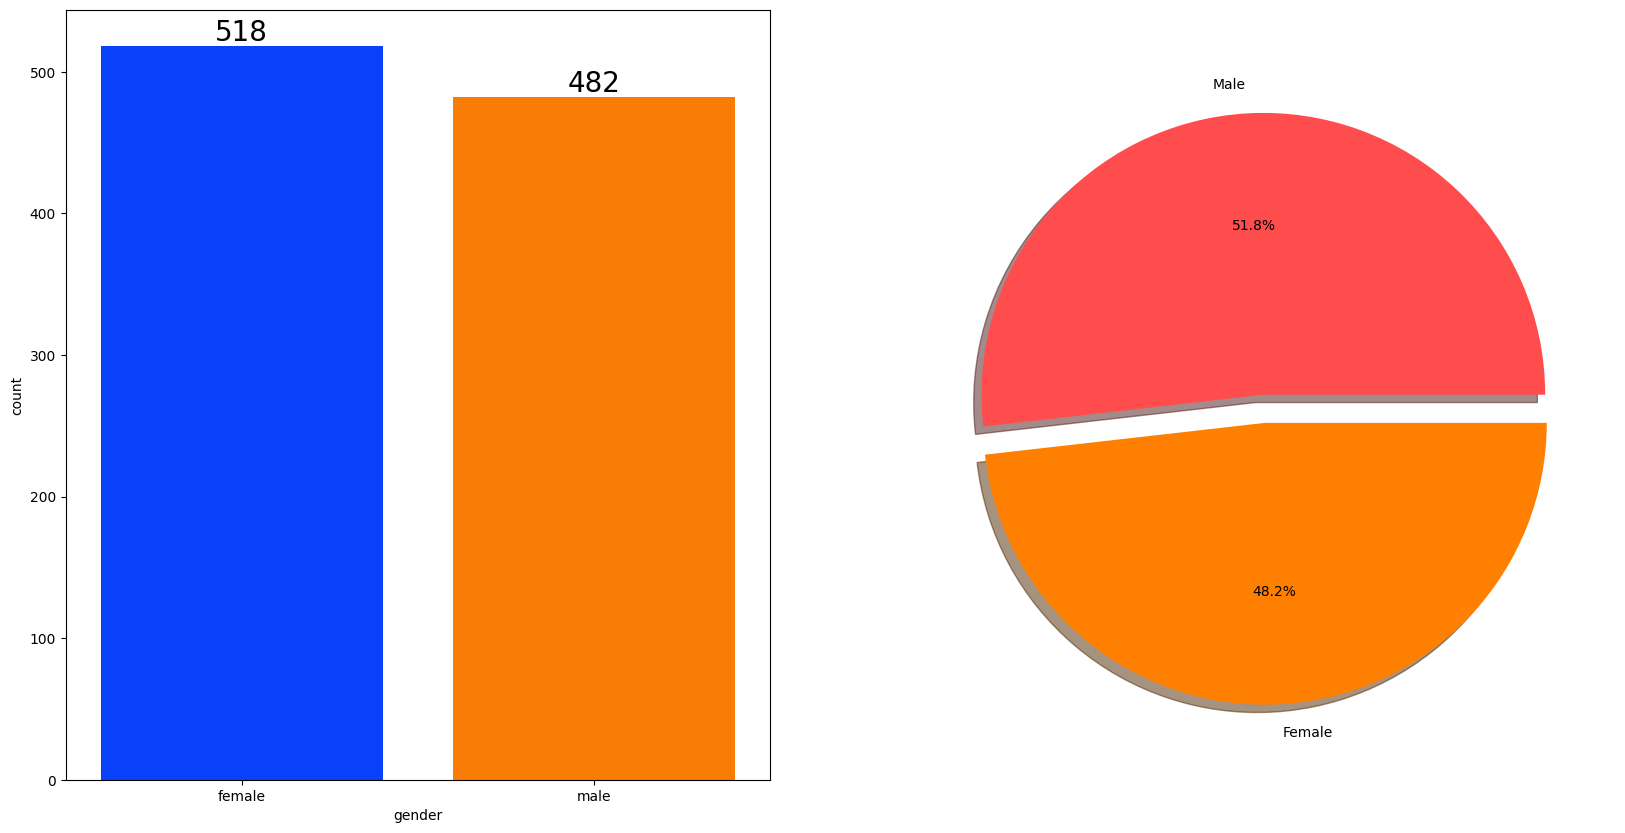

In [23]:
# univariate analysis

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

insights - gender has balanced data with female students are 518 and male are 482

In [27]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


C:\Users\samri\AppData\Local\Temp\ipykernel_19584\4135721979.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
C:\Users\samri\AppData\Local\Temp\ipykernel_19584\4135721979.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores = [gender_group['average'][1], gender_group['math_score'][1]]


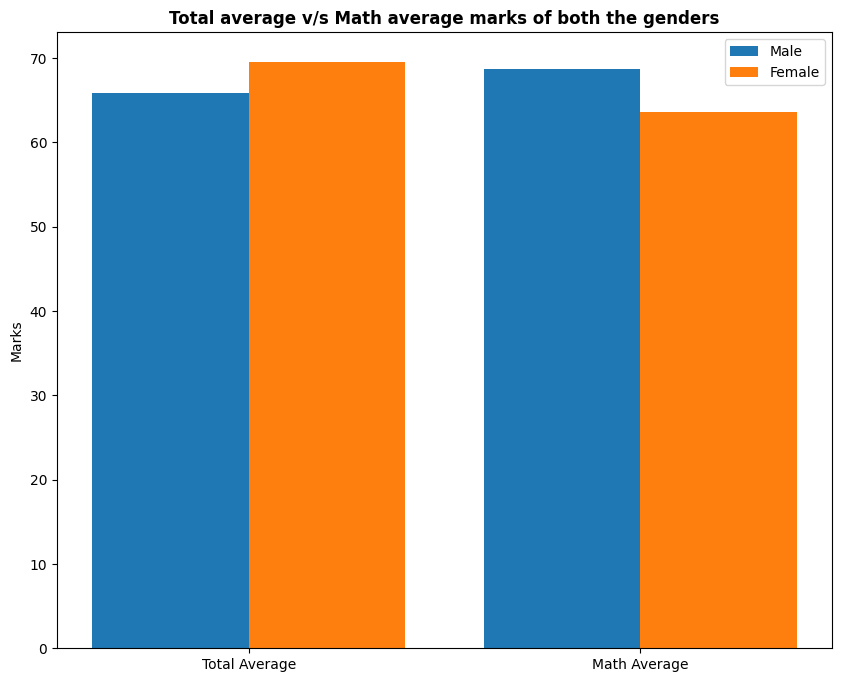

In [30]:

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis -0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

insights

>males have performed better in Maths than females

>females have performed better in all the subjects overall than males

In [31]:
# Race/Ethinicity Column

# how is Group wise distribution?
# is Race/Ethinicity has any impact on student's performance?

C:\Users\samri\AppData\Local\Temp\ipykernel_19584\660193100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)


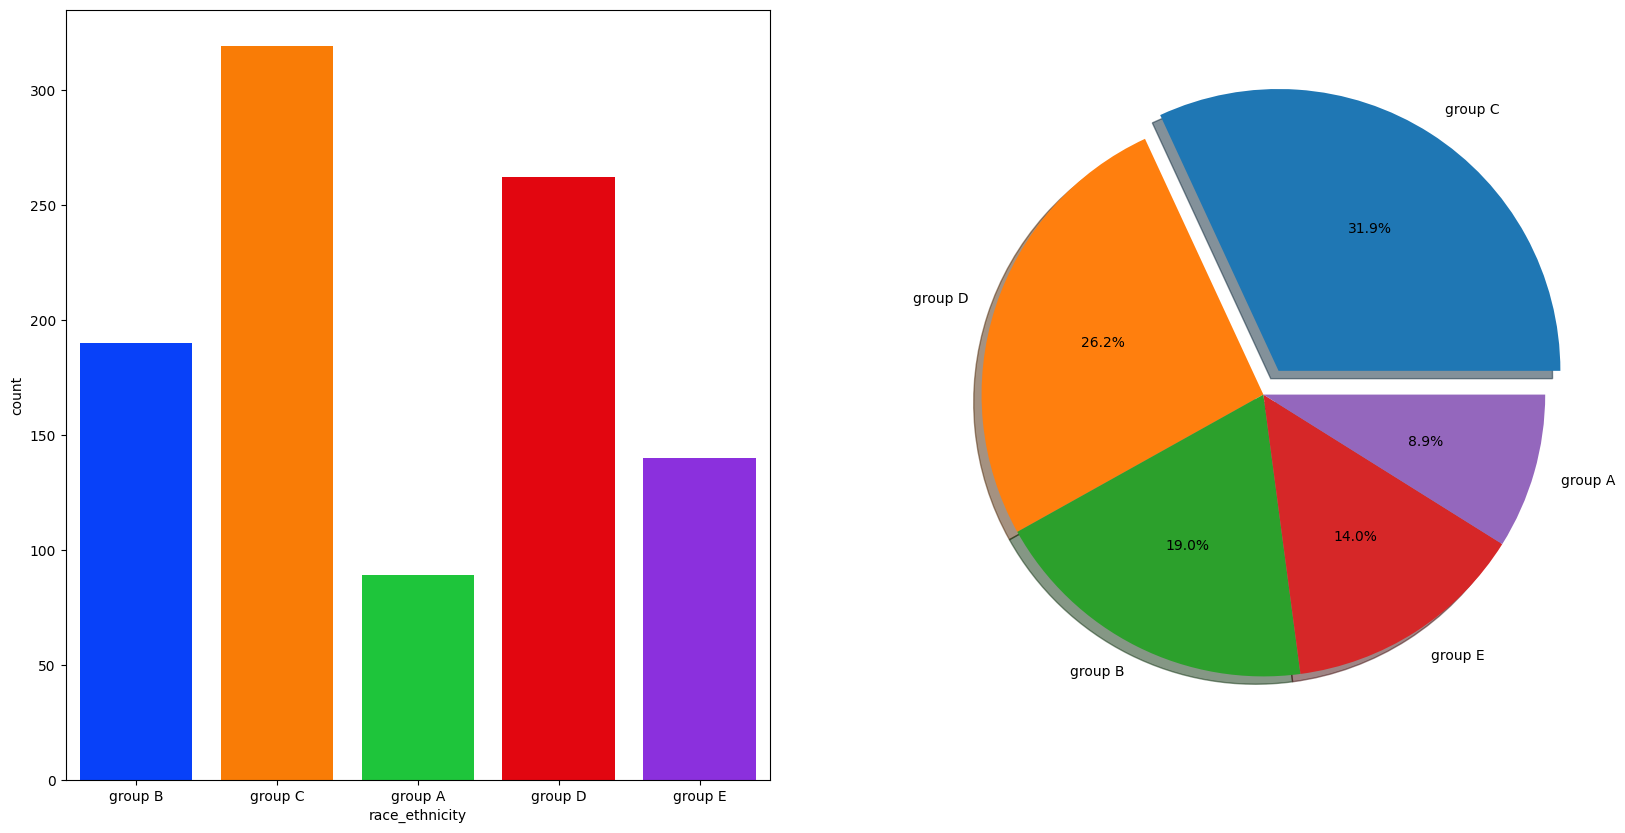

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
# for container in ax[0].containers:
#     ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  


Insights

Most of the student belonging from group C /group D.

Lowest number of students belong to groupA.

Bivariate Analysis(is Race/Ethinicity has any impact on student's performance)

In [43]:
Group_data2 = df.groupby('race_ethnicity').mean(numeric_only=True)
Group_data2




,math_score,reading_score,writing_score,total_score,average
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


Parental Level of education column

what is eduactional background of student's parent?

is parental education has any impact on student's performance?

C:\Users\samri\AppData\Local\Temp\ipykernel_19584\2493213282.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental_level_of_education'],palette='bright')


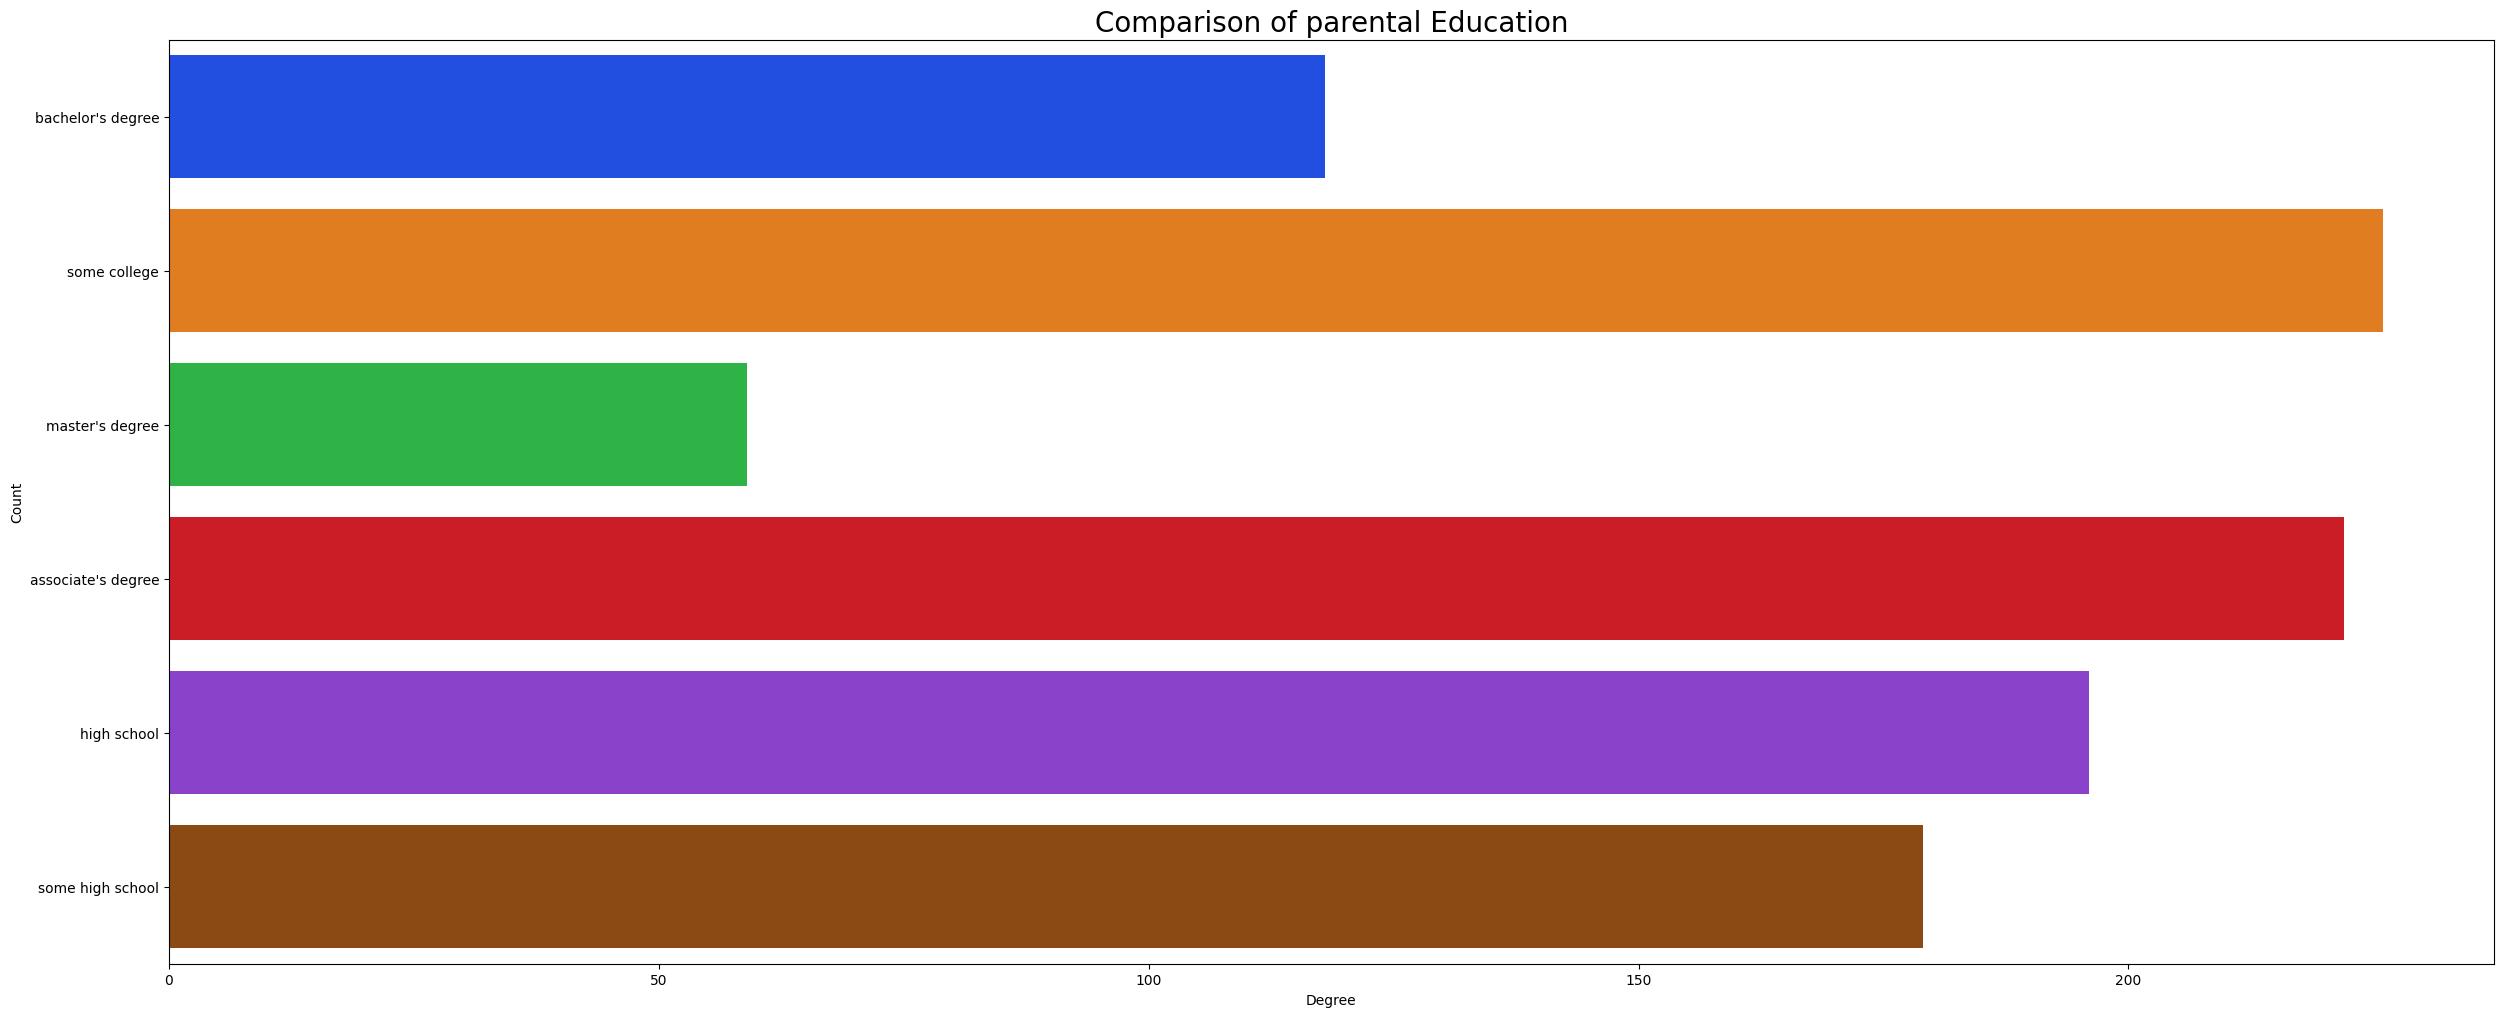

In [79]:
sns.countplot(df['parental_level_of_education'],palette='bright')
plt.title('Comparison of parental Education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()


Insight :-
Most parents have taken their education from some college not any fancy degree

A lot of parents also have associate's degree

Bivariate Analysis(Is parentaleducation has any impact on student's performance ? )

In [82]:
df.groupby('parental_level_of_education').mean(numeric_only=True)

,math_score,reading_score,writing_score,total_score,average
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


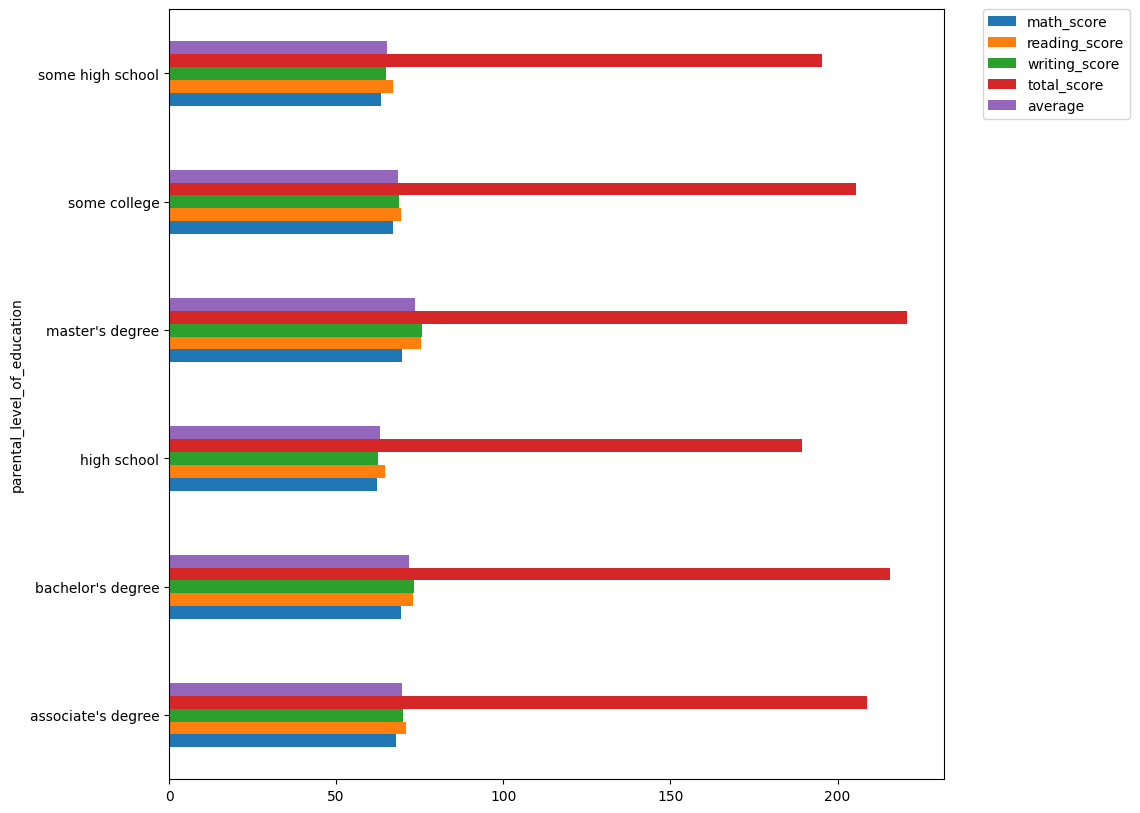

In [85]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insight -

The score of student whose parents possess master and bachelor level education are higher than others.

Lunch Column

C:\Users\samri\AppData\Local\Temp\ipykernel_19584\1574873987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['lunch'], palette = 'PuBu')


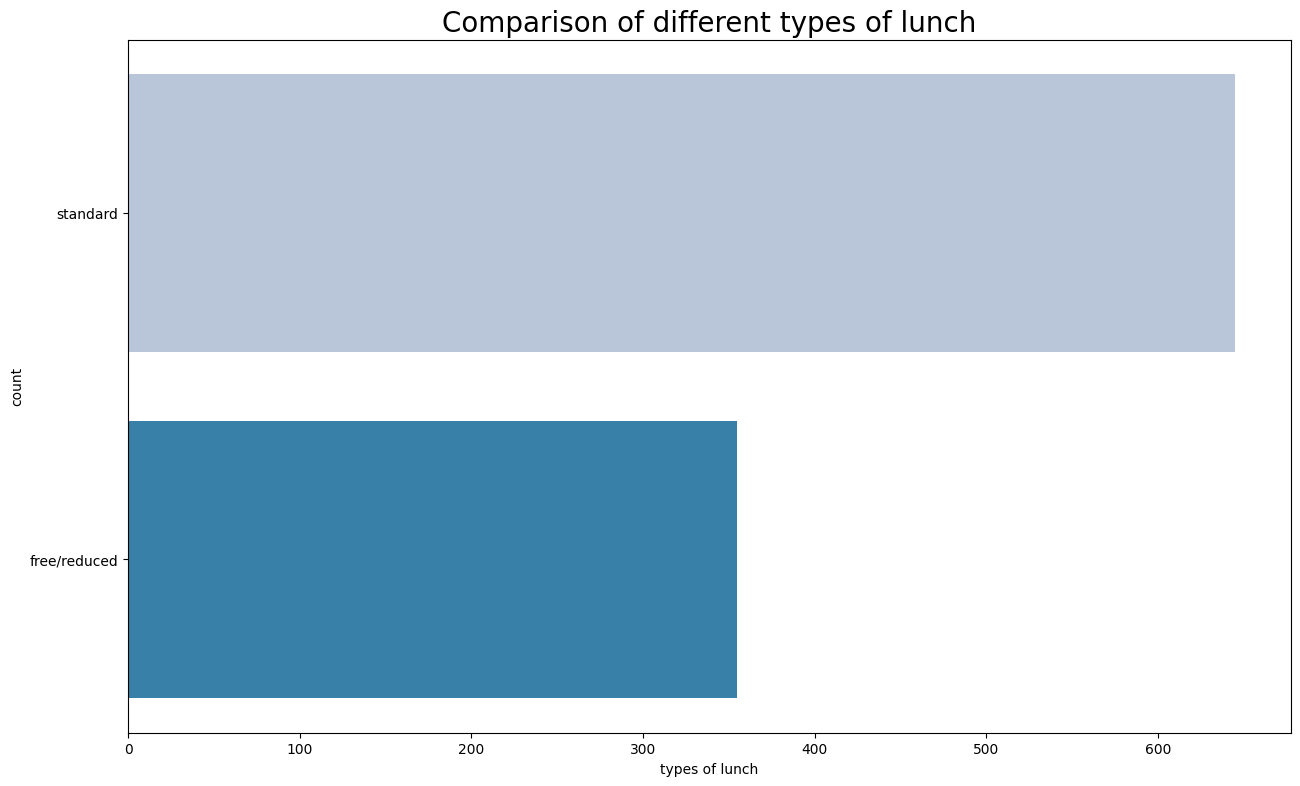

In [90]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insight 

The number of students with standard type of lunch is more than the students with free/reduced type of lunch


BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

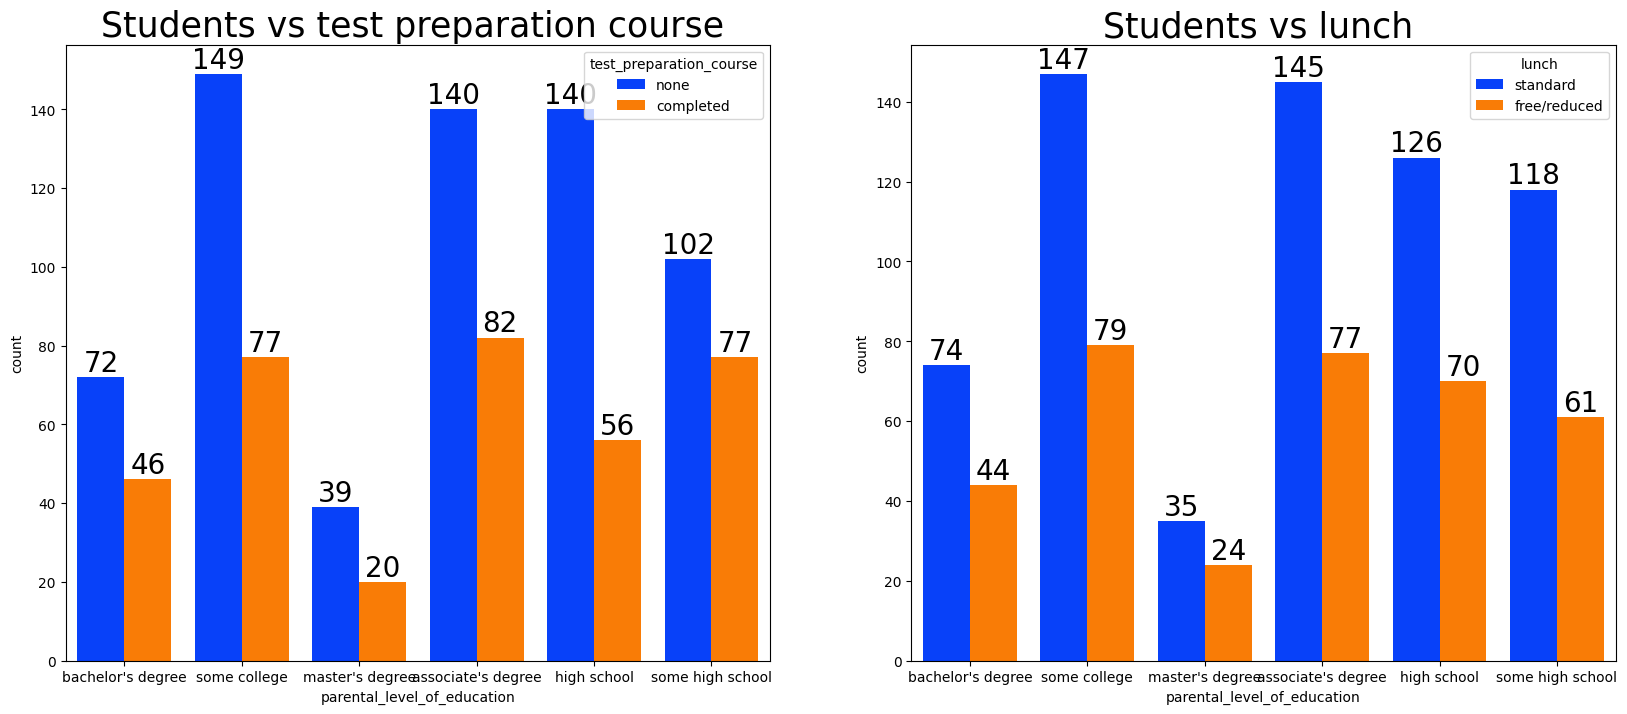

In [95]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_title('Students vs lunch ',color='black',size=25)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

Test Preparation Column(Is test preparation course has any impact on students performance)

<Axes: xlabel='lunch', ylabel='writing_score'>

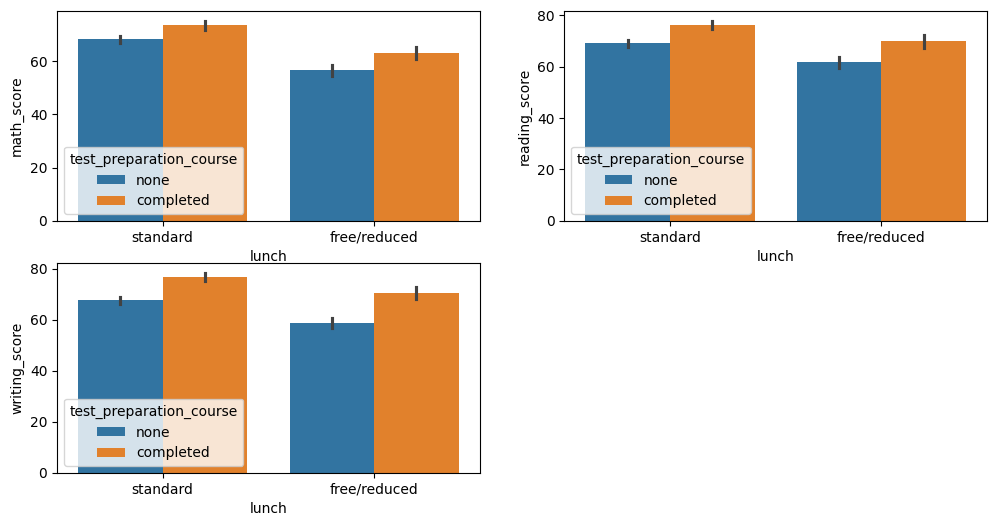

In [97]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Insight - Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

Outliers

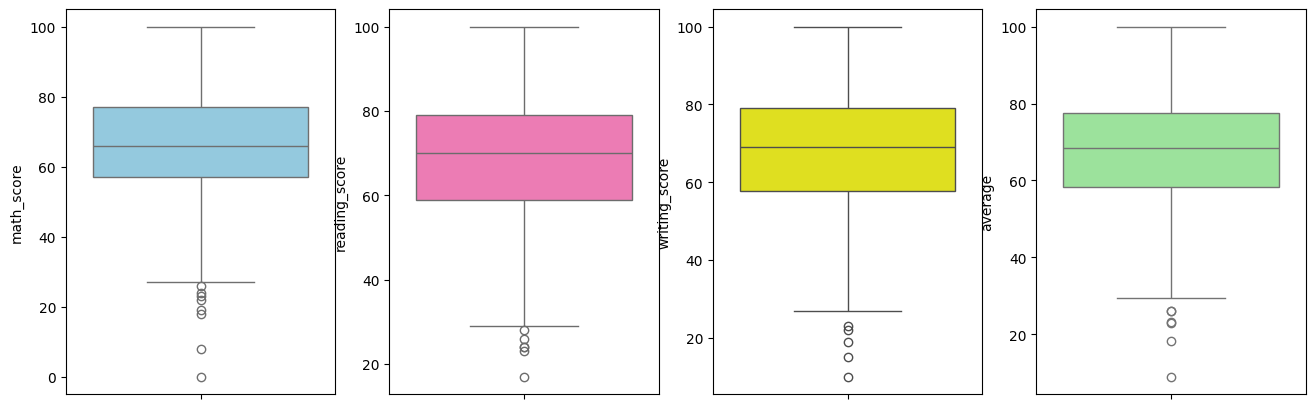

In [99]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

Insight 

from the above graph we can clearly see there are some outliers

Multivariate Analysis using pairplot

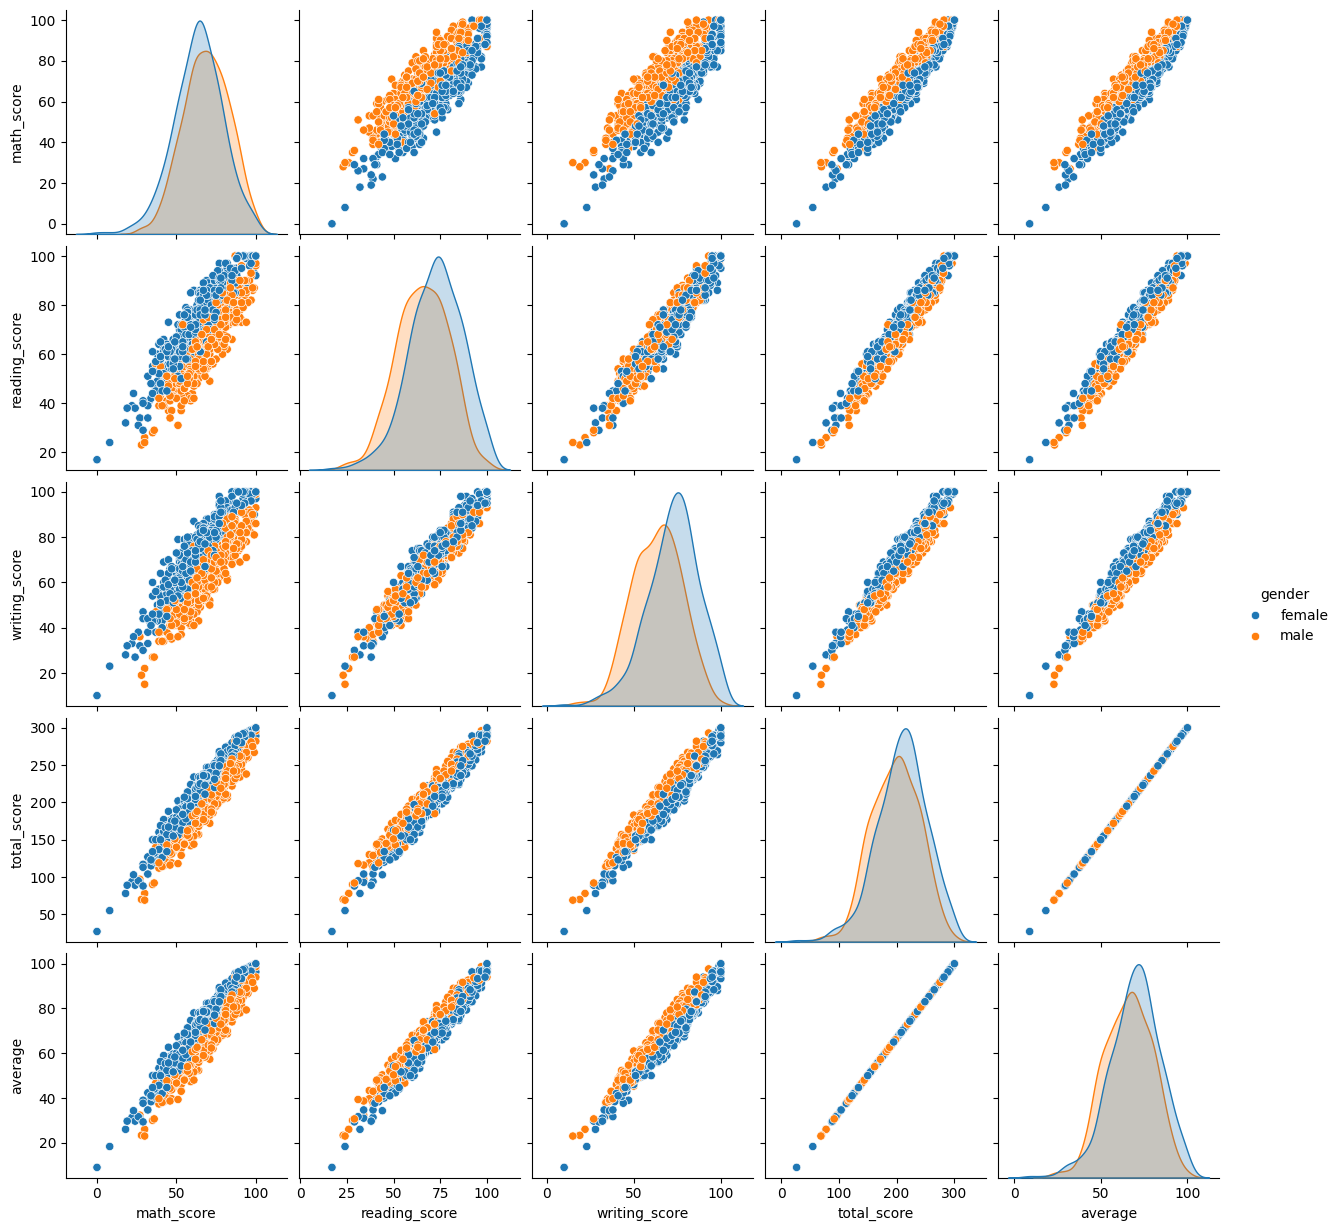

In [100]:
sns.pairplot(df,hue = 'gender')
plt.show()

CONCLUSION
Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.